In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.3 MB/s et

In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/winequality-red.csv', delimiter=';')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(data['alcohol'].value_counts())

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


In [ ]:
data_filtered = data.groupby('alcohol').filter(lambda x: len(x) > 1)

In [ ]:
from pycaret.regression import *

# Setup the PyCaret environment
reg = setup(data_filtered, target="alcohol")

# Create a model
reg_model = create_model('lr')

# Evaluate the model
evaluate_model(reg_model)


,Description,Value
0,Session id,7911
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1586, 12)"
4,Transformed data shape,"(1586, 12)"
5,Transformed train set shape,"(1110, 12)"
6,Transformed test set shape,"(476, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4849,0.4394,0.6629,0.5706,0.0577,0.0466
1,0.4670,0.3744,0.6119,0.6439,0.0536,0.0458
2,0.4263,0.3325,0.5766,0.7141,0.0492,0.0399
3,0.4910,0.4317,0.6570,0.6304,0.0559,0.0462
4,0.4477,0.3730,0.6108,0.6109,0.0535,0.0435
5,0.4567,0.3234,0.5687,0.6823,0.0499,0.0443
6,0.4335,0.3256,0.5706,0.7419,0.0488,0.0411
7,0.4892,0.3914,0.6256,0.6437,0.0534,0.0465
8,0.4614,0.3539,0.5949,0.6683,0.0526,0.0448


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Setup


In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data_filtered, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1586, 12)"
4,Transformed data shape,"(1586, 12)"
5,Transformed train set shape,"(1110, 12)"
6,Transformed test set shape,"(476, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(data_filtered, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1586, 12)"
4,Transformed data shape,"(1586, 12)"
5,Transformed train set shape,"(1110, 12)"
6,Transformed test set shape,"(476, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3444,0.2403,0.4886,0.7751,0.0419,0.0327,0.3200
xgboost,Extreme Gradient Boosting,0.3473,0.2676,0.5154,0.7502,0.0441,0.0329,0.2350
et,Extra Trees Regressor,0.3581,0.2783,0.5268,0.7410,0.0451,0.0340,0.3310
rf,Random Forest Regressor,0.3862,0.2914,0.5387,0.7283,0.0462,0.0367,0.6170
gbr,Gradient Boosting Regressor,0.4002,0.2918,0.5394,0.7281,0.0464,0.0382,0.3310
lr,Linear Regression,0.4569,0.3577,0.5969,0.6683,0.0518,0.0438,0.0260
lar,Least Angle Regression,0.4569,0.3577,0.5969,0.6683,0.0518,0.0438,0.0440
ada,AdaBoost Regressor,0.5424,0.4507,0.6709,0.5805,0.0581,0.0524,0.2500
dt,Decision Tree Regressor,0.5067,0.5760,0.7573,0.4566,0.0652,0.0480,0.0790
br,Bayesian Ridge,0.6625,0.7140,0.8437,0.3396,0.0721,0.0629,0.0440


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

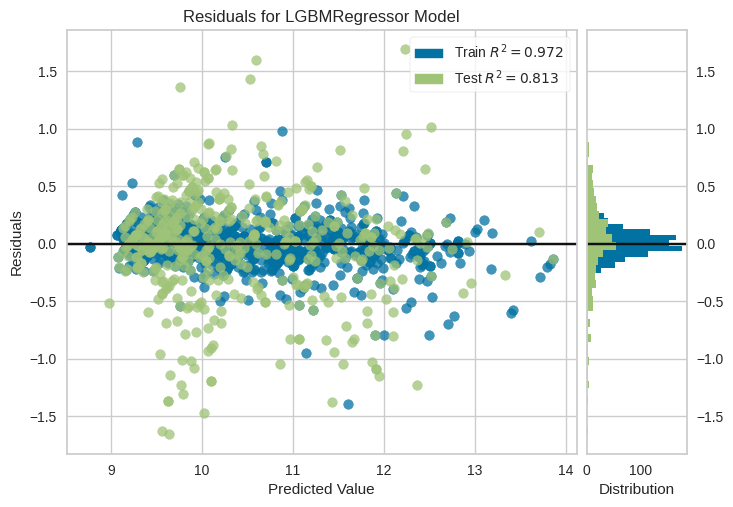

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

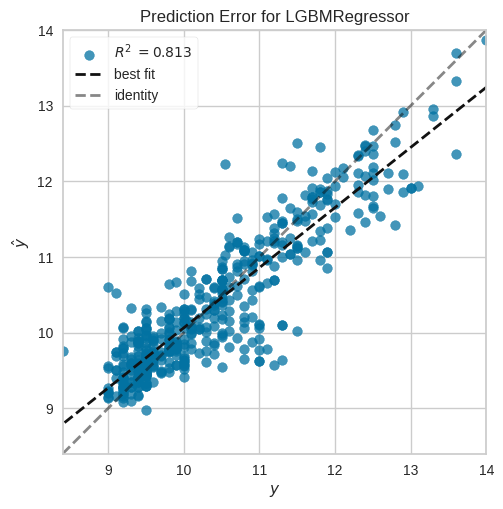

In [ ]:
# plot error
plot_model(best, plot = 'error')

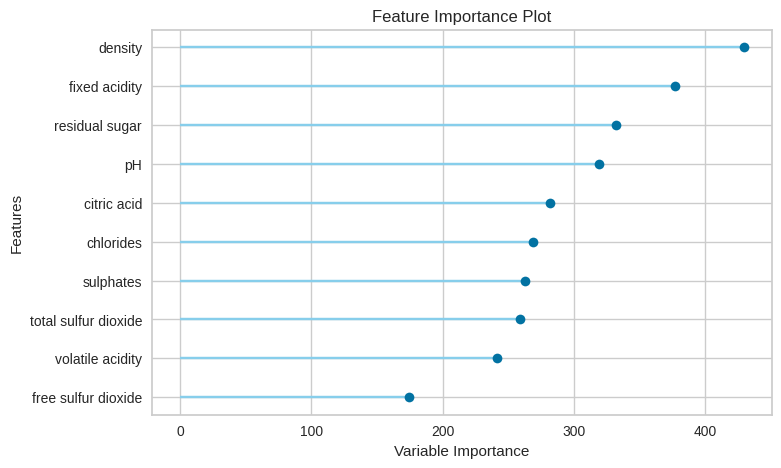

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

___

## Prediction


In [ ]:
# predict on test set
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3269,0.2112,0.4596,0.8132,0.0398,0.0311


In [ ]:
# show predictions df
pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
785,9.9,0.350,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,5,9.5,9.522997
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,7,13.6,13.328683
626,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,5,9.1,9.748202
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,5,9.5,9.546731
343,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,6,9.8,10.013064


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.453505
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.687942
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.851143
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.897929
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.453505


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'my_first_pipeline.pkl')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))])

In [ ]:
s = setup(data_filtered, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1586, 12)"
4,Transformed data shape,"(1586, 12)"
5,Transformed train set shape,"(1110, 12)"
6,Transformed test set shape,"(476, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
969,6.7,0.56,0.09,2.9,0.079,7.0,22.0,0.99669,3.46,0.61,5.0
1405,7.7,0.28,0.30,2.0,0.062,18.0,34.0,0.99520,3.28,0.90,7.0
468,11.4,0.36,0.69,2.1,0.090,6.0,21.0,1.00000,3.17,0.62,6.0
409,12.5,0.46,0.49,4.5,0.070,26.0,49.0,0.99810,3.05,0.57,4.0
556,10.9,0.53,0.49,4.6,0.118,10.0,17.0,1.00020,3.07,0.56,6.0
...,...,...,...,...,...,...,...,...,...,...,...
1124,6.5,0.58,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,4.0
1349,6.9,0.57,0.00,2.8,0.081,21.0,41.0,0.99518,3.41,0.52,5.0
1409,6.0,0.51,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,6.0
1392,7.1,0.62,0.06,1.3,0.070,5.0,12.0,0.99420,3.17,0.48,5.0


In [ ]:
from pycaret.regression import *

# Assuming 'data' is your DataFrame with a continuous target variable 'alcohol'
s = setup(data, target='alcohol', session_id=123, normalize=True, normalize_method='zscore')


,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# init setup with normalize = True
s = setup(data, target = 'alcohol', session_id = 123,
          normalize = True, normalize_method = 'zscore')

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


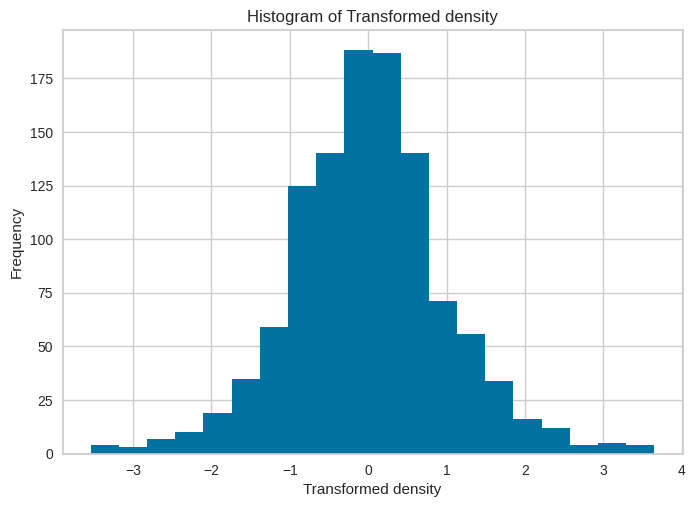

In [ ]:
transformed_data = get_config('X_train_transformed')

# Plot a histogram for the 'pH' column
transformed_data['density'].hist(bins=20)  # You can adjust the number of bins as needed
plt.title('Histogram of Transformed density')
plt.xlabel('Transformed density')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot: >

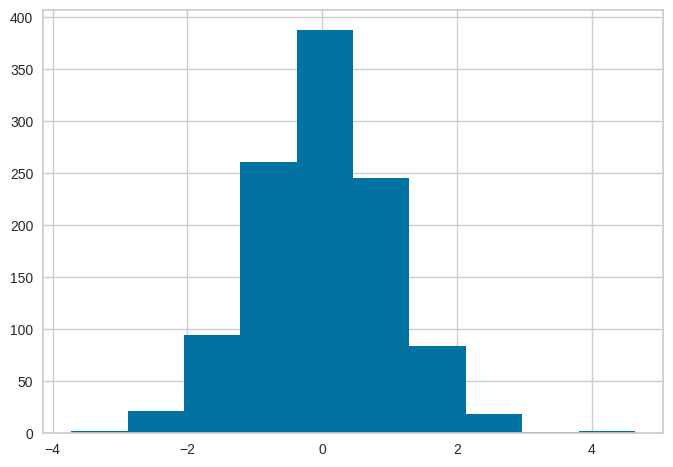

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['pH'].hist()

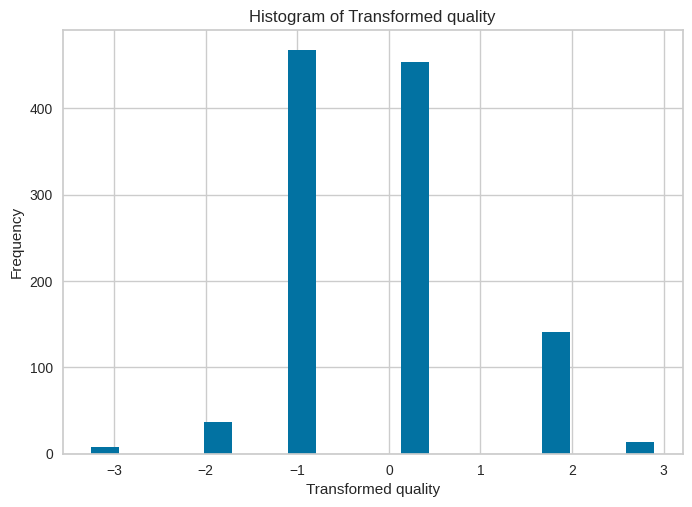

In [ ]:
transformed_data = get_config('X_train_transformed')

# Plot a histogram for the 'pH' column
transformed_data['quality'].hist(bins=20)  # You can adjust the number of bins as needed
plt.title('Histogram of Transformed quality')
plt.xlabel('Transformed quality')
plt.ylabel('Frequency')
plt.show()

___

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3476,0.2686,0.5164,0.7534,0.0439,0.0330,0.3680
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1560
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.5610
rf,Random Forest Regressor,0.3756,0.2947,0.5409,0.7300,0.0462,0.0357,0.7110
gbr,Gradient Boosting Regressor,0.3993,0.2956,0.5424,0.7299,0.0464,0.0381,0.2000
ridge,Ridge Regression,0.4534,0.3609,0.5971,0.6692,0.0517,0.0434,0.0300
br,Bayesian Ridge,0.4535,0.3610,0.5972,0.6692,0.0517,0.0434,0.0310
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.8750
huber,Huber Regressor,0.4482,0.3638,0.5989,0.6668,0.0519,0.0429,0.0400
knn,K Neighbors Regressor,0.4644,0.3988,0.6291,0.6364,0.0534,0.0438,0.0440


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
best_mse_models_top3 = compare_models(sort = 'MSE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3476,0.2686,0.5164,0.7534,0.0439,0.0330,0.1830
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1490
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.4250
rf,Random Forest Regressor,0.3756,0.2947,0.5409,0.7300,0.0462,0.0357,0.5530
gbr,Gradient Boosting Regressor,0.3993,0.2956,0.5424,0.7299,0.0464,0.0381,0.3480
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0530
ridge,Ridge Regression,0.4534,0.3609,0.5971,0.6692,0.0517,0.0434,0.0480
br,Bayesian Ridge,0.4535,0.3610,0.5972,0.6692,0.0517,0.0434,0.1040
huber,Huber Regressor,0.4482,0.3638,0.5989,0.6668,0.0519,0.0429,0.0400
knn,K Neighbors Regressor,0.4644,0.3988,0.6291,0.6364,0.0534,0.0438,0.0380


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by MAE
best_mse_models_top3

[LGBMRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [ ]:
!pip install mlflow

In [ ]:
from pycaret.regression import *
from pycaret.datasets import get_data
from pycaret.loggers import MlflowLogger

In [ ]:

s = setup(data, target='alcohol')


,Description,Value
0,Session id,6998
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preprocess:

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4327,0.3090,0.5559,0.7230,0.0485,0.0418
1,0.4153,0.2885,0.5371,0.7107,0.0472,0.0396
2,0.4060,0.2674,0.5171,0.7154,0.0452,0.0395
3,0.4486,0.3841,0.6198,0.6534,0.0533,0.0429
4,0.5348,0.4463,0.6681,0.6594,0.0590,0.0515
5,0.4906,0.4365,0.6607,0.6485,0.0557,0.0454
6,0.5184,0.4374,0.6614,0.6520,0.0583,0.0508
7,0.4155,0.3092,0.5561,0.7373,0.0469,0.0395
8,0.4872,0.3592,0.5994,0.7316,0.0517,0.0461


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4327,0.3090,0.5559,0.7230,0.0485,0.0418
1,0.4153,0.2885,0.5371,0.7107,0.0472,0.0396
2,0.4060,0.2674,0.5171,0.7154,0.0452,0.0395
3,0.4486,0.3841,0.6198,0.6534,0.0533,0.0429
4,0.5348,0.4463,0.6681,0.6594,0.0590,0.0515
5,0.4906,0.4365,0.6607,0.6485,0.0557,0.0454
6,0.5184,0.4374,0.6614,0.6520,0.0583,0.0508
7,0.4155,0.3092,0.5561,0.7373,0.0469,0.0395
8,0.4872,0.3592,0.5994,0.7316,0.0517,0.0461


In [ ]:
# train linear regression with fold=5
lr = create_model('lr', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4246,0.3000,0.5477,0.7171,0.0479,0.0407
1,0.4275,0.3257,0.5707,0.6821,0.0494,0.0412
2,0.5069,0.4365,0.6607,0.6590,0.0570,0.0478
3,0.4710,0.3774,0.6143,0.6899,0.0532,0.0456
4,0.4902,0.3792,0.6158,0.6893,0.0529,0.0462
Mean,0.4640,0.3638,0.6018,0.6875,0.0521,0.0443
Std,0.0331,0.0474,0.0393,0.0186,0.0032,0.0028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6633,0.7755,0.8806,0.3048,0.0750,0.0631
1,0.6103,0.6597,0.8122,0.3383,0.0692,0.0573
2,0.6331,0.5712,0.7557,0.3922,0.0660,0.0611
3,0.6905,0.7407,0.8606,0.3315,0.0742,0.0663
4,0.7481,0.7933,0.8907,0.3945,0.0766,0.0712
5,0.7398,0.8539,0.9240,0.3124,0.0782,0.0686
6,0.7837,0.9475,0.9734,0.2462,0.0840,0.0760
7,0.6951,0.7915,0.8896,0.3275,0.0753,0.0662
8,0.7041,1.0179,1.0089,0.2395,0.0830,0.0640


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [ ]:
# stack models
stack_models(best_mse_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2980,0.1770,0.4207,0.8413,0.0362,0.0286
1,0.2775,0.1440,0.3795,0.8555,0.0330,0.0264
2,0.2674,0.1432,0.3785,0.8476,0.0318,0.0254
3,0.3427,0.2290,0.4786,0.7933,0.0408,0.0327
4,0.3705,0.2555,0.5055,0.8050,0.0444,0.0355
5,0.3697,0.3075,0.5545,0.7524,0.0461,0.0335
6,0.3657,0.2738,0.5232,0.7822,0.0456,0.0357
7,0.2807,0.1636,0.4045,0.8610,0.0340,0.0268
8,0.4295,0.3455,0.5878,0.7419,0.0479,0.0400


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2964,0.1781,0.4220,0.8404,0.0360,0.0281
1,0.2828,0.1518,0.3896,0.8478,0.0338,0.0269
2,0.2729,0.1644,0.4055,0.8250,0.0343,0.0259
3,0.3685,0.2577,0.5077,0.7674,0.0433,0.0350
4,0.3354,0.2276,0.4771,0.8263,0.0417,0.0320
5,0.4037,0.3471,0.5891,0.7205,0.0493,0.0367
6,0.3811,0.3048,0.5521,0.7575,0.0477,0.0369
7,0.3085,0.2032,0.4508,0.8273,0.0377,0.0292
8,0.4416,0.4451,0.6671,0.6675,0.0537,0.0407


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/9 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4637,0.3632,0.6003,0.6873,0.0520,0.0443
1,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4633,0.3627,0.6008,0.6908,0.0520,0.0442
2,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4640,0.3638,0.6018,0.6875,0.0521,0.0443
3,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4640,0.3638,0.6018,0.6875,0.0521,0.0443
4,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.6984,0.7952,0.8891,0.3159,0.0757,0.0661
6,Stacking Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.3336,0.2264,0.4706,0.8076,0.0401,0.0316
7,Light Gradient Boosting Machine,"(TransformerWrapper(include=['fixed acidity', ...",0.3444,0.2520,0.4951,0.7861,0.0420,0.0325


In [ ]:
# select the best model based on MSE
lb.sort_values(by='MSE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleIm...
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=123, ...)),
                                               ('Extra Trees Regressor',
                                                ExtraTreesRegressor(n_jobs=-1,
                                                                    random_state=123))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1, passthrough=True)]])

In [ ]:
 help(get_leaderboard)

Help on function get_leaderboard in module pycaret.regression.functional:

get_leaderboard(finalize_models: bool = False, model_only: bool = False, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True) -> pandas.core.frame.DataFrame
    This function returns the leaderboard of all models trained in the
    current setup.
    
    
    Example
    -------
    >>> from pycaret.regression import get_leaderboard
    >>> leaderboard = get_leaderboard()
    
    
    finalize_models: bool, default = False
        If True, will finalize all models in the 'Model' column.
    
    
    model_only: bool, default = False
        When set to False, only model object is returned, instead
        of the entire pipeline.
    
    
    fit_kwargs: dict, default = {} (empty dict)
        Dictionary of arguments passed to the fit method of the model.
        Ignored if finalize_models is False.
    
    
    groups: str or array-like, with shape (n_samples,),

In [ ]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=123))])

In [ ]:
!pip install m2cgen

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'my_first_model.pkl')

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,6845
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple
